In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
train = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_train.csv')
test = pd.read_csv('/workspaces/AITemplate/Kaggle/Titanic/Datasets/Titanic_test.csv')

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
#Change the categorical data to numerical data
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"] = train["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
train["Embarked"].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [85]:
#Change the categorical data to numerical data
test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
test["Embarked"].value_counts()

Embarked
0    270
1    102
2     46
Name: count, dtype: int64

In [86]:
train["Sex"] = train["Sex"].fillna("male")
train["Sex"] = train["Sex"].map({"male": 0, "female": 1}).astype(int)
train["Sex"].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [87]:
test["Sex"] = test["Sex"].fillna("male")
test["Sex"] = test["Sex"].map({"male": 0, "female": 1}).astype(int)
test["Sex"].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [88]:
train.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)

In [89]:
test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [90]:
train = train.dropna()

In [91]:
test["Age"].fillna(test.Age.mean(), inplace=True)

In [92]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [94]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1)

Epoch 1/100


179/179 [==============================] - 1s 943us/step - loss: 0.6976 - accuracy: 0.6499
Epoch 2/100
179/179 [==============================] - 0s 969us/step - loss: 0.6200 - accuracy: 0.6541
Epoch 3/100
179/179 [==============================] - 0s 931us/step - loss: 0.6140 - accuracy: 0.6905
Epoch 4/100
179/179 [==============================] - 0s 952us/step - loss: 0.5788 - accuracy: 0.7185
Epoch 5/100
179/179 [==============================] - 0s 942us/step - loss: 0.5450 - accuracy: 0.7395
Epoch 6/100
179/179 [==============================] - 0s 941us/step - loss: 0.5460 - accuracy: 0.7507
Epoch 7/100
179/179 [==============================] - 0s 939us/step - loss: 0.5203 - accuracy: 0.7689
Epoch 8/100
179/179 [==============================] - 0s 936us/step - loss: 0.5419 - accuracy: 0.7479
Epoch 9/100
179/179 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7535
Epoch 10/100
179/179 [==============================] - 0s 949us/step - loss: 0.4988 - 

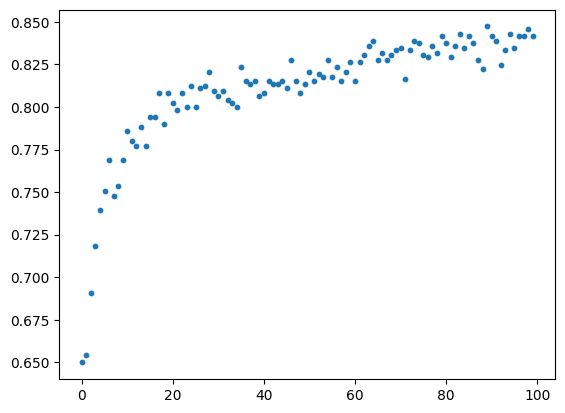

In [95]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

number_of_epochs = 100
model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=4, verbose=1)

plt.scatter(range(number_of_epochs), model.history.history['accuracy'], s=10)
predictions = (model.predict(X_test) > 0.5).astype(int)
print(predictions[:10])

In [97]:
# Creating a submission file
def make_submission(kaggle_predictions):
    path="/workspaces/AITemplate/Kaggle/Titanic/Submissions/NeuralNetworkSubmission5.csv"
    kaggle_predictions.to_csv(path, index=False)
    print(f"Submission exported to {path}")
    
kaggle_predictions = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions.reshape(-1)

})
make_submission(kaggle_predictions)

Submission exported to /workspaces/AITemplate/Kaggle/Titanic/Submissions/NeuralNetworkSubmission5.csv
